# Simplest Image Classification

In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
!python3 create-img.py

## 1. Reading to matrices

In [3]:
vertical = cv2.imread("vertical.jpg", cv2.IMREAD_GRAYSCALE)
horizontal = cv2.imread("horizontal.jpg", cv2.IMREAD_GRAYSCALE)

## 2. Arrays

In [4]:
print("Vertical:\n",vertical)
print("Horizontal:\n",horizontal)

Vertical:
 [[  0 255   0]
 [  0 255   0]
 [  0 255   0]]
Horizontal:
 [[  0   0   0]
 [255 255 255]
 [  0   0   0]]


## 3. Normalisation

In [5]:
vertical = vertical/255
horizontal = horizontal/255

In [6]:
print("After normalization, Vertical:\n",vertical)
print("After normalization, Horizontal:\n",horizontal)

After normalization, Vertical:
 [[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
After normalization, Horizontal:
 [[0. 0. 0.]
 [1. 1. 1.]
 [0. 0. 0.]]


## 4. Flattening

In [7]:
vertical_flat = vertical.flatten()
horizontal_flat = horizontal.flatten()
print("Vertical Falttened", vertical_flat)
print("Horizontal Falttened",horizontal_flat)

Vertical Falttened [0. 1. 0. 0. 1. 0. 0. 1. 0.]
Horizontal Falttened [0. 0. 0. 1. 1. 1. 0. 0. 0.]


## 5. Viewing

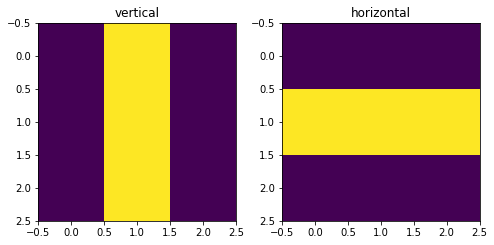

In [41]:
plt.figure(figsize=(8., 8.))

plt.subplot(221)
plt.imshow(vertical)
plt.gca().set_title('vertical')

plt.subplot(222)
plt.imshow(horizontal)
plt.gca().set_title('horizontal')

plt.show()

In [10]:
#Making the flattened image from 1-D to 2-D for ploltting in matploltib 
vertical_ = np.expand_dims(vertical_flat, axis=1) 
horizontal_ = np.expand_dims(horizontal_flat, axis=1) 

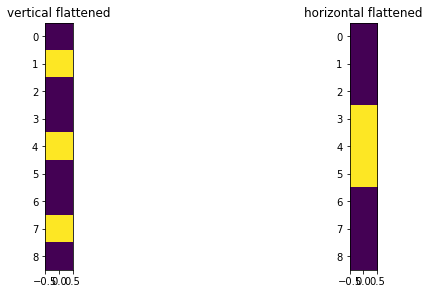

In [45]:
plt.figure(figsize=(10., 10.))

plt.subplot(221)
plt.imshow(vertical_)
plt.gca().set_title('vertical flattened')

plt.subplot(222)
plt.imshow(horizontal_)
plt.gca().set_title('horizontal flattened')

plt.show()

## 6. Creating Image Classifier 
Using above operations like falttening, convolution, normalization, we now create our final image classifier as a function below.

In [13]:
#Images to test model on
test1 = cv2.imread("test1.jpg", cv2.IMREAD_GRAYSCALE)
test2 = cv2.imread("test2.jpg", cv2.IMREAD_GRAYSCALE)

In [14]:
def classify_img(img):
    img=img/255
    img_flatten = img.flatten()
    filter_ = [1,-1,1,1,-1,1,1,-1,1]
    convolution = img_flatten*filter_
    print("Convolution : ",convolution)
    
    sum_conv = sum(convolution)
    print("Sum of Convolution: ",sum_conv)
    
    if sum_conv == 1:
        return "Horizontal Image"
    else:
        return "Vertical Image"

In [15]:
classify_img(test1)

Convolution :  [ 0. -0.  1.  0. -0.  1.  0. -0.  1.]
Sum of Convolution:  3.0


'Vertical Image'

In [16]:
classify_img(test2)

Convolution :  [ 0. -0.  0.  0. -0.  0.  1. -1.  1.]
Sum of Convolution:  1.0


'Horizontal Image'

## 7. Testing  

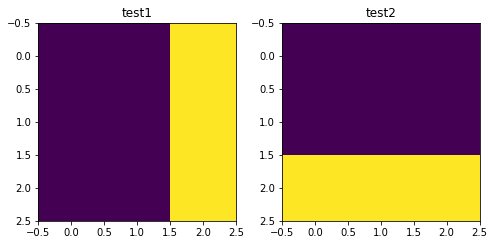

In [40]:
plt.figure(figsize=(8., 8.))

plt.subplot(221)
plt.imshow(test1)
plt.gca().set_title('test1')

plt.subplot(222)
plt.imshow(test2)
plt.gca().set_title('test2')

plt.show()

# Thankyou